In [1]:
##Importing The Libraries
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loan = pd.read_csv('./loan.csv',low_memory=False)
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


# Data cleaning - 1
Shape of data set is 39717,111
We will check the columns which are empty/null or none and will remove the same

In [2]:
print(round(loan.isnull().sum()/len(loan) * 100,2).sort_values(ascending=False))

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

In [3]:
# Dropping of columns havong 50+% null values
loan.dropna(axis=1,thresh=19859,inplace=True)

In [4]:
## Checking the shape of data set after removing columns
print("The current shape of data set is reduce to ",loan.shape)

The current shape of data set is reduce to  (39717, 54)


In [5]:
##Getting data that has more than 1 unique values in column value set
a1 = loan.apply(lambda x: pd.DataFrame(x.unique()).count()).T
loan = loan[a1[0][a1[0] >1].index]
print("The current shape of data set is reduce to ",loan.shape)

The current shape of data set is reduce to  (39717, 45)


In [6]:
##Filtering the data set only for pass and failed loans
loan = loan.loc[loan.loan_status != "Current",:]
print(loan.shape)

(38577, 45)


In [7]:
# Removing the columns that have duplicate information & no utility for analysis
loan.drop(['url','member_id','out_prncp','out_prncp_inv','id'] , axis = 1 , inplace = True)

In [8]:
print(loan.shape)

(38577, 40)


# Describing Data Set

### We identified various columns which we consider to be important in EDA analysis. We will check data quality for same

####  COLUMNS 
       * emp_length      * loan_status           * annual_inc  * int_rate
       * term            * home_ownership        * open_acc    
       * loan_purpose    * verification_status   * loan_amnt   

#### Visualizing data columns of interest

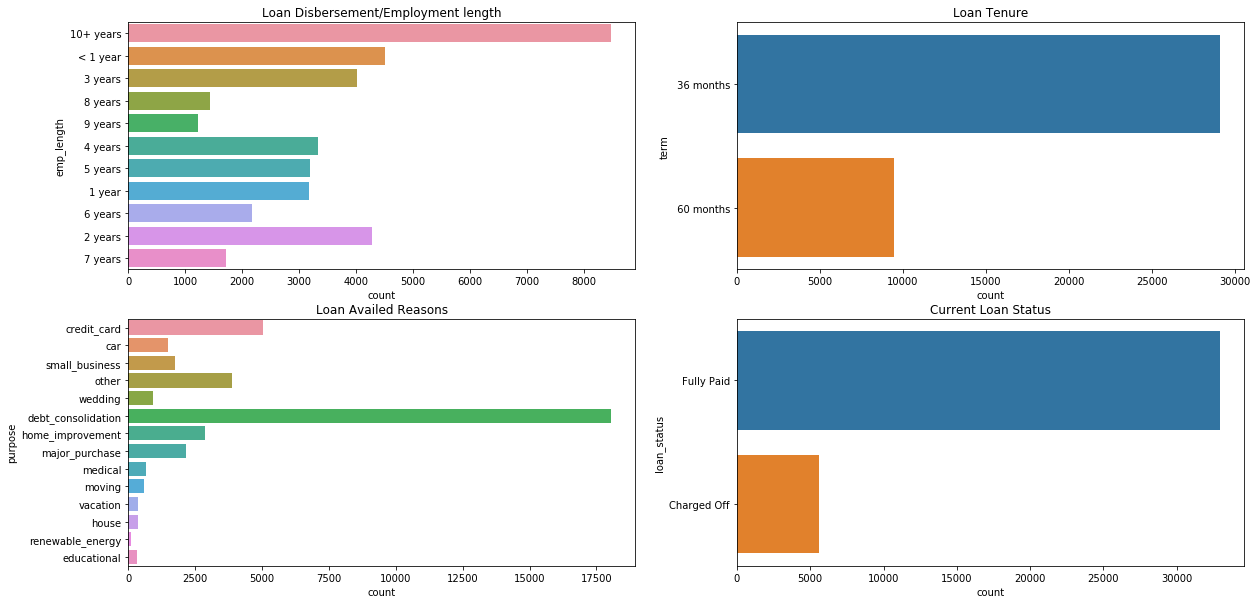

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title("Loan Disbersement/Employment length")
sns.countplot(y='emp_length',data=loan)
plt.subplot(222)
plt.title("Loan Tenure")
sns.countplot(y='term',data=loan)
plt.subplot(223)
plt.title("Loan Availed Reasons")
sns.countplot(y='purpose',data=loan)
plt.subplot(224)
plt.title("Current Loan Status")
sns.countplot(y='loan_status',data=loan)
plt.show()

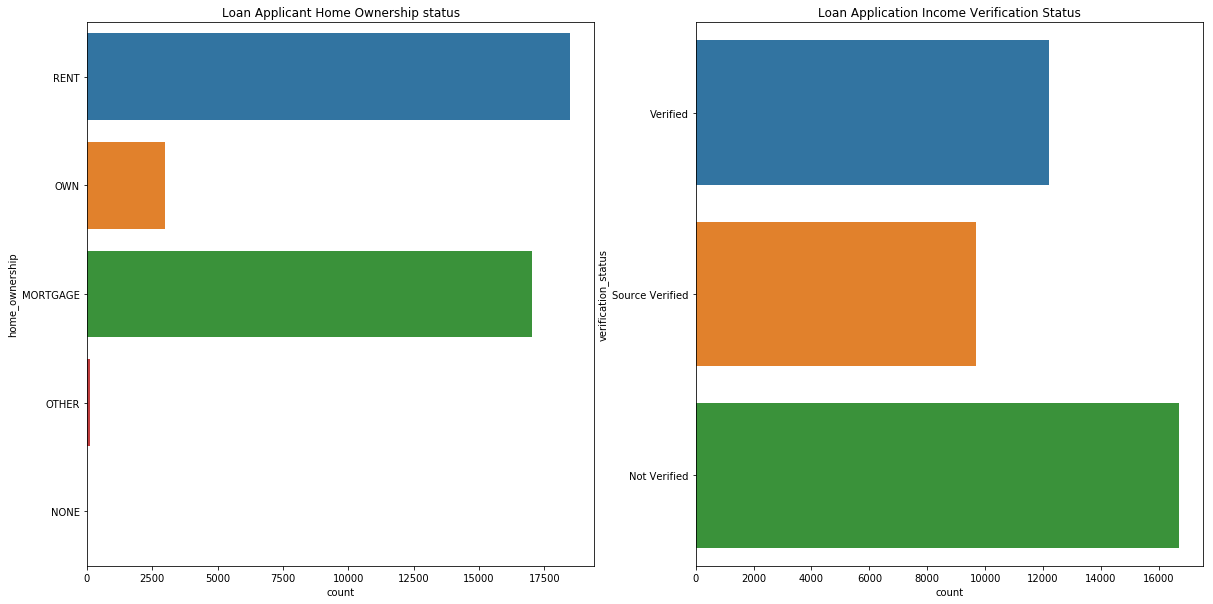

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Loan Applicant Home Ownership status")
sns.countplot(y='home_ownership',data=loan)
plt.subplot(122)
plt.title("Loan Application Income Verification Status")
sns.countplot(y='verification_status',data=loan)
plt.show()

# Observation 
#### 1: In emp_length we can see that still we have value of n/a
#### 2: Total data set available for Charged Off accounts are 5000+
#### 3: Many loan applicants income status is not been verified
#### 4: In home_ownership columns we still have some values as NONE
#### 5: Large number of loans undertaken are with tenure of 36 months

# DATA Preparation

#### In this we are going to normailze the data for comupation and analysis

In [11]:
def clean_emp_length(data):
    """This function will remove the < or > or + or ' ' from the data"""
    data = data.replace('<','').replace('>','').replace('+','').strip('years').strip('year').strip()
    return data

# Cleaning emp_length data remvoing 10+ -> 10 <1 ->1
# Assumption we are making an assumption that we will be bucketing <1 and 1 into 1 bin & 10+ and 10 in bin of 10

loan['emp_length'] = loan['emp_length'].astype('str')
loan['emp_length'] = loan['emp_length'].apply(clean_emp_length)
loan=loan[~(loan['emp_length']=='n/')]
print(loan['emp_length'].unique())

['10' '1' '3' '8' '9' '4' '5' '6' '2' '7' 'nan']


In [12]:
loan_emp_length_nan = loan.loc[loan['emp_length'] =='nan',:]
loan_home_ownership_none = loan.loc[loan['home_ownership'] == 'NONE',:]
print("emp_length: % of 'nan' value: ", len(loan_emp_length_nan) / len(loan) * 100)
print("home_ownership: % of 'NONE' value: ",len(loan_home_ownership_none) / len(loan) * 100)

emp_length: % of 'nan' value:  2.6777613603960906
home_ownership: % of 'NONE' value:  0.00777665448324131


In [13]:
loan_emp_not_nan = loan.loc[loan['emp_length'] !='nan',['emp_length']]
loan_emp_not_nan['emp_length'] = loan_emp_not_nan['emp_length'].astype('int')
loan_emp_not_nan['emp_length'].describe()

count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

# NOTE: Drop the emp_length with n/a value is just 3 % of the data

mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000

We don't think we should consider it to impute with 4 which looks like a median

In [14]:
## Removing this entries

loan = loan.loc[loan['emp_length'] !='nan',:]
loan = loan.loc[loan['home_ownership'] != 'NONE',:]

print(loan.shape)



(37541, 40)


In [15]:
loan['int_rate']=loan['int_rate'].apply(lambda x:x.replace('%',''))
loan['int_rate']=loan['int_rate'].astype(float)

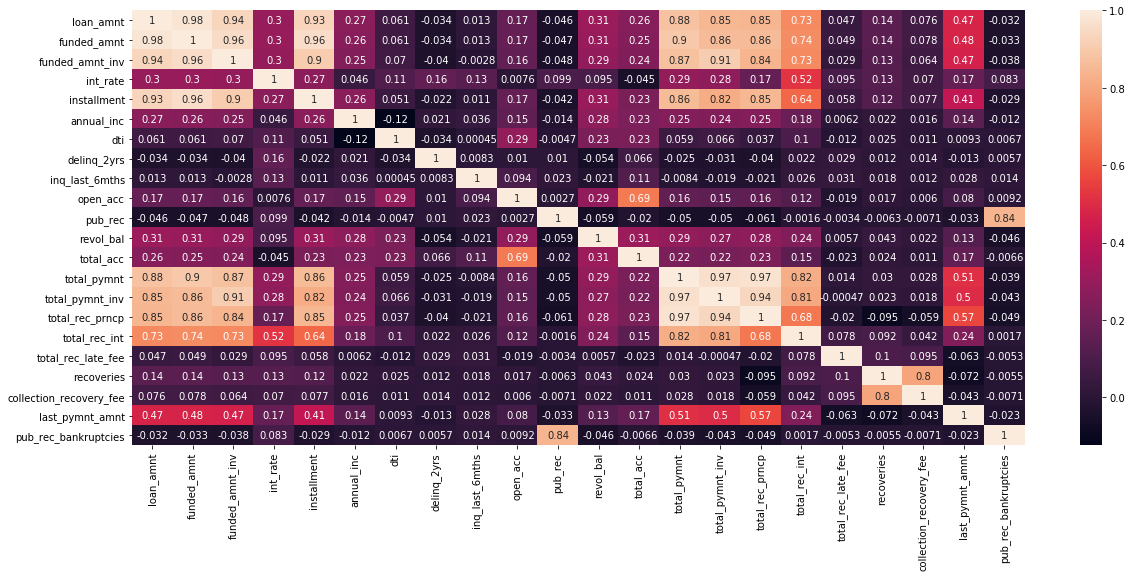

In [16]:
plt.figure(figsize=(20, 8))

vg_corr = loan.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [17]:
## Following coloumns show strong correlation and business wise too will show similar values
## loan_amnt , funded_amnt , funded_amnt_inv , installment , total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_int
##Hence it would make sense to proably keep 1 with the strongest correlations amongst them
d1 = ['funded_amnt','funded_amnt_inv' ,'installment' ,'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','pub_rec_bankruptcies' ]
loan.drop(d1 , axis = 1 , inplace = True)

In [18]:
#For Percentage Breakdown
def col_merge(col):
    c1 = loan.groupby(col).loan_status.apply(lambda x : round(sum(x != 'Fully Paid' )/len(x)*100,1))
    c2 = loan.groupby(col).loan_status.apply(lambda x : round(len(x)/len(loan)*100,1))
    c3 = pd.concat([c1,c2],axis =1)
    c3.columns = ["Def%","Pop%"]
    c3['Level'] = c3.index
    c3['category'] = col
    return c3
def draw_hist(col, index,row_index=2):
    c3=col_merge(col)
    plt.subplot(row_index,2,index)
    ax2=sns.barplot(y="Def%", x="Level",  data=c3);
    ax2.set(xlabel=col, ylabel='Default%')
    widthbars = c3['Pop%']/c3['Pop%'].max()
    for bar,newwidth in zip(ax2.patches,widthbars):
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width/2.
        bar.set_x(centre-newwidth/2.)
        bar.set_width(newwidth)

In [19]:
##Decile Charts for Continuos Variables
def draw_deciles(col,index,title="",yl="",xl=""):
    a = loan[col].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    b1 = pd.DataFrame([loan.loc[(loan[col] <= x) & (loan.loan_status != 'Fully Paid'),'loan_status'].count() for x in  list(a)])
    b1['percent_data'] = (b1.index + 1)/10
    b1['percent_defaults'] = round(b1[0]/b1[0].max(),2)
    plt.subplot(3,3,index)
    if(title!=""):
        plt.title(title)
    ax=plt.scatter(x = 'percent_data' ,y = 'percent_defaults' , data = b1)
    plt.plot([0,1],[0,1])
    if(xl!=""):
        plt.xlabel(xl)
    if(yl!=""):
        plt.ylabel(yl)
         #ax.set_xlabel("Hello")

In [20]:
##Box Plots for the Continuous variables 
def draw(val,index,title=""):
    plt.subplot(3,3,index)
    if(plt!=""):
        plt.title(title)
    ax = sns.boxplot(x='loan_status', y= val, data= loan)

In [21]:
###Getting numeric coloumns which are not counts (more than 20 Values)
a = np.array(loan.apply(lambda x : len(x.unique()) > 20))
b = np.array(loan.dtypes != 'object')
b = loan.loc[:,a & b].columns

In [22]:
###Getting Summary data
a = loan.loan_status == 'Fully Paid'
a1 = [pd.Series([loan.loc[a,x].mean(), loan.loc[np.logical_not(a),x].mean() , 
         loan.loc[a,x].median(), loan.loc[np.logical_not(a),x].median()]) for x in b]
a1 = pd.DataFrame(a1).apply(lambda x: round(x,0))
a1.columns = [ "Non_Default_Mean" , "Charged_Off_Mean" ,  "Non_Default_Med" , "Charged_Off_Med"]
a1.index = b
a1

,Non_Default_Mean,Charged_Off_Mean,Non_Default_Med,Charged_Off_Med
loan_amnt,10931.0,12244.0,9600.0,10000.0
int_rate,12.0,14.0,11.0,14.0
annual_inc,70427.0,63331.0,60000.0,54000.0
dti,13.0,14.0,13.0,14.0
open_acc,9.0,9.0,9.0,9.0
revol_bal,13321.0,13623.0,8773.0,9332.0
total_acc,22.0,22.0,21.0,20.0
total_rec_late_fee,1.0,4.0,0.0,0.0
recoveries,0.0,685.0,0.0,180.0
collection_recovery_fee,0.0,89.0,0.0,3.0


In [23]:
###While Last Payment amnt , collection recovery , recovery and total_rec_late_fee are showing massive difference
##These are more outcomes of defaults
b = b[ [x not in ['total_rec_late_fee' , 'recoveries' , 'collection_recovery_fee' , 'last_pymnt_amnt'] for x in b]]

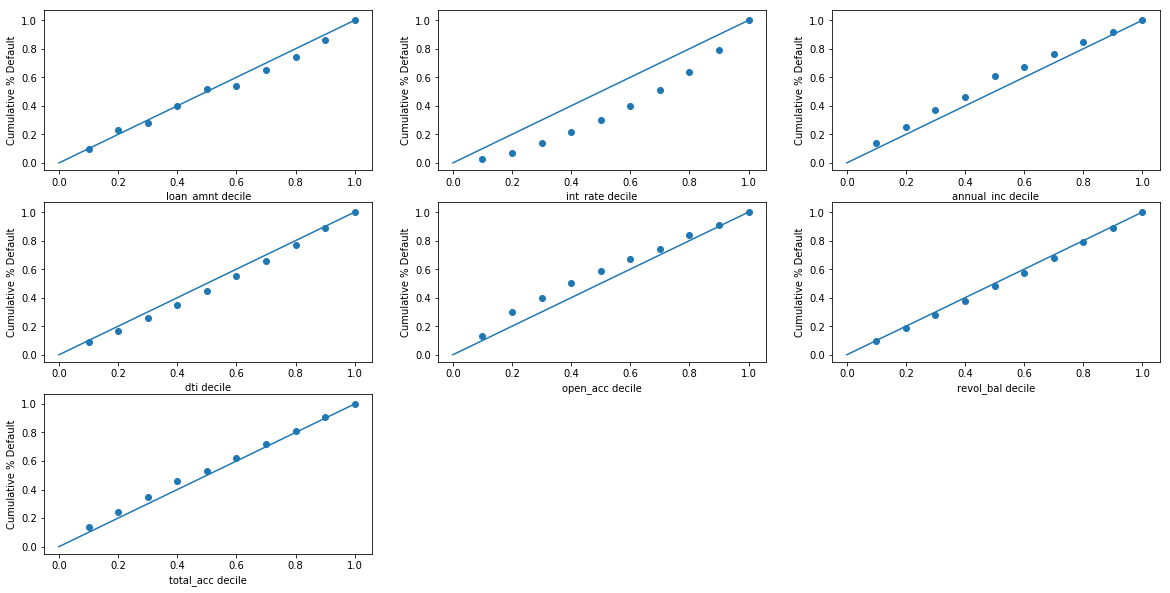

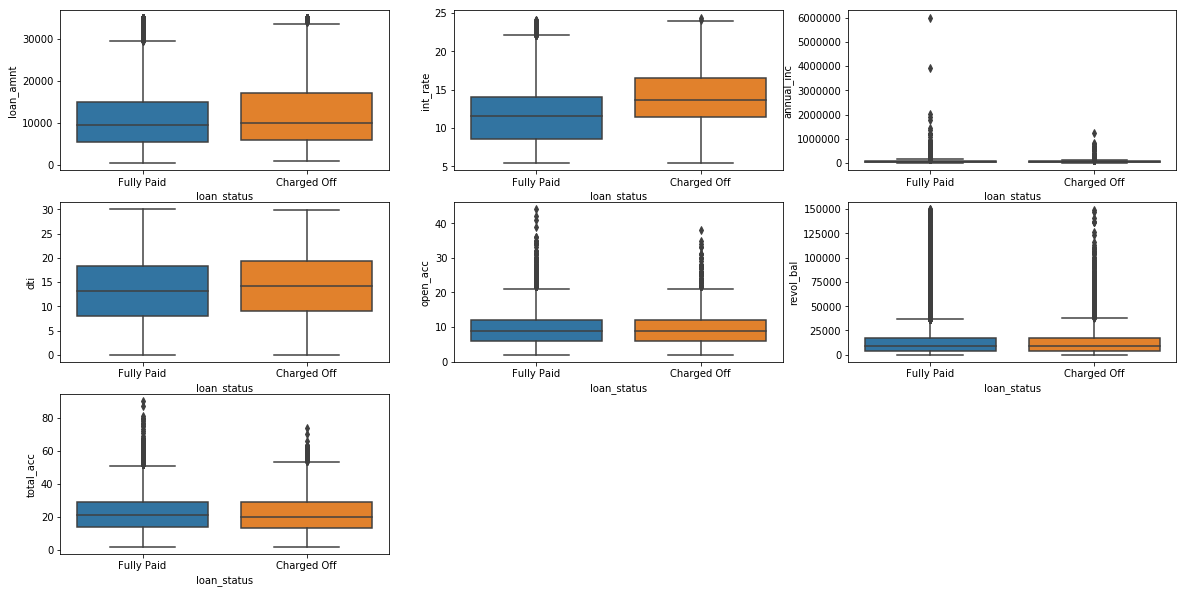

In [24]:
### todo need to add x, y labels
# y - axis - cummulative % in defaults
# x - categorical variable decile
plt.figure(figsize=(20,10))   
for i in range(0,len(b),1):
    draw_deciles(b[i],i+1,yl='Cumulative % Default',xl=b[i]+" decile")
plt.show()
plt.figure(figsize=(20,10))   
for i in range(0,len(b),1):
    draw(b[i],i+1)
plt.show()

In [25]:
# Default % age & population % for count type variables.
a = np.array(loan.apply(lambda x : len(x.unique()) <= 20))
b = np.array(loan.dtypes != 'object')
b = loan.loc[:,a & b].columns
df = pd.DataFrame(columns = ['category' , 'Level' , "Def%" , "Pop%" ])
for i in range(0,len(b),1):
    df=pd.concat([df,col_merge(b[i])])
df['base_Percent']  = round(sum(loan.loan_status != 'Fully Paid' )/len(loan)*100,1)
df

,Def%,Level,Pop%,category,base_Percent
0,14.2,0,89.1,delinq_2yrs,14.4
1,15.6,1,8.3,delinq_2yrs,14.4
2,19.0,2,1.7,delinq_2yrs,14.4
3,15.0,3,0.5,delinq_2yrs,14.4
4,22.0,4,0.2,delinq_2yrs,14.4
5,14.3,5,0.1,delinq_2yrs,14.4
6,10.0,6,0.0,delinq_2yrs,14.4
7,25.0,7,0.0,delinq_2yrs,14.4
8,50.0,8,0.0,delinq_2yrs,14.4
9,0.0,9,0.0,delinq_2yrs,14.4


In [26]:
###Based on the Lower Frequenct at Higher Counts , All can be clubbed
loan['deliq_flag'] = 'No'
loan.loc[loan['delinq_2yrs'] > 0 ,'deliq_flag'] = 'Yes'
loan.drop('delinq_2yrs' , axis = 1 , inplace = True)
loan['inq_flag'] = 'No'
loan.loc[loan.inq_last_6mths > 0 ,'inq_flag'] = 'Yes'
loan.drop('inq_last_6mths' , axis = 1 , inplace = True)
loan['pub_rec_flag'] = 'No'
loan.loc[loan.pub_rec > 0 ,'pub_rec_flag'] = 'Yes'
loan.drop('pub_rec' , axis = 1 , inplace = True)


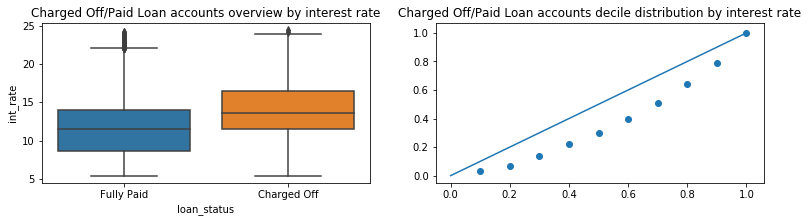

In [27]:
# Interest rate for the defaults.
plt.figure(figsize=(20,10))
draw('int_rate',1,"Charged Off/Paid Loan accounts overview by interest rate")
draw_deciles('int_rate',2,"Charged Off/Paid Loan accounts decile distribution by interest rate")
plt.show()

In [28]:
##Looking at Frequency of Categorical Data
loan.loc[:,loan.dtypes == 'object'].apply(lambda x: len(x.unique()))

term                       2
grade                      7
sub_grade                 35
emp_title              27983
emp_length                10
home_ownership             4
verification_status        3
issue_d                   55
loan_status                2
desc                   25200
purpose                   14
title                  18846
zip_code                 821
addr_state                50
earliest_cr_line         514
revol_util              1087
last_pymnt_d             102
last_credit_pull_d       107
deliq_flag                 2
inq_flag                   2
pub_rec_flag               2
dtype: int64

In [29]:
loan_emp_length = pd.pivot_table(loan,values='loan_amnt' ,columns='loan_status',index='emp_length',aggfunc='count')
loan_emp_length['Percentage_CO'] = (100 * loan_emp_length['Charged Off']) / (loan_emp_length['Charged Off'] + loan_emp_length['Fully Paid'])
loan_emp_length.reset_index(inplace=True)
loan_emp_length.emp_length=loan_emp_length.emp_length.astype(int)
loan_emp_length.sort_values('Percentage_CO',ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Percentage_CO
1,10,1331,7157,15.680961
7,7,263,1448,15.371128
5,5,458,2735,14.343877
0,1,1095,6580,14.267101
6,6,307,1861,14.160517
8,8,203,1232,14.146341
3,3,555,3457,13.833500
4,4,462,2880,13.824057
2,2,567,3724,13.213703
9,9,158,1068,12.887439


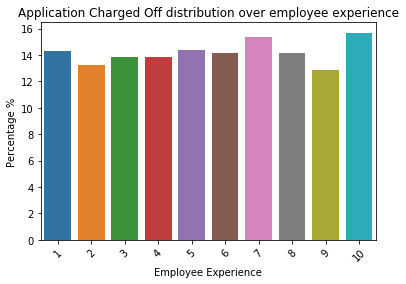

In [30]:
ax=sns.barplot(y=loan_emp_length['Percentage_CO'],x=loan_emp_length['emp_length'])
ax.set(ylabel='Percentage %',xlabel='Employee Experience')
plt.title("Application Charged Off distribution over employee experience")
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

# Observation
#### Employee with experience of 1, 7 and 10+ year contribute highest to Charge Off accounts. 
    * Possibility that people with 7 or 10+ experience may be struggling with job
    * People with 1 year of eexperience, may be jobless for pursuing jobs

#### Consideration: Even though above are some observation but overall charged off account percent is evenly distributed across applicant experience. 

# Checking the impact of verification status on Loan accounts status

In [31]:
loan_v_status = pd.pivot_table(loan,values='loan_amnt', columns='loan_status',index='verification_status',aggfunc='count')
loan_v_status['Percentage_CO'] = (100 * loan_v_status['Charged Off']) / (loan_v_status['Charged Off'] + loan_v_status['Fully Paid'])
loan_v_status['Percentage_FP'] = (100 * loan_v_status['Fully Paid']) / (loan_v_status['Charged Off'] + loan_v_status['Fully Paid'])
print(" The Percentage of Loan Application Verification Status")
loan_v_status.sort_values('Percentage_CO',ascending=False)

 The Percentage of Loan Application Verification Status


loan_status,Charged Off,Fully Paid,Percentage_CO,Percentage_FP
verification_status,,,,
Verified,1954,9818,16.598709,83.401291
Source Verified,1396,8098,14.704024,85.295976
Not Verified,2049,14226,12.589862,87.410138


# Observation 
The above table reflect that percentage of Charged Off with Income status verified or not looks evenly distributed.
So we can't use home_ownership as contributing variable for default analysis.

2: Analysing relationship of home ownership on Charged Off accounts



In [32]:
loan_home_ownership = pd.pivot_table(loan,values='loan_amnt', columns='loan_status',index='home_ownership',aggfunc='count',fill_value=0)
loan_home_ownership['Percentage_CO'] = (100 * loan_home_ownership['Charged Off']) / (loan_home_ownership['Charged Off'] + loan_home_ownership['Fully Paid'])
loan_home_ownership.sort_values('Percentage_CO',ascending=False)

loan_status,Charged Off,Fully Paid,Percentage_CO
home_ownership,,,
OTHER,18,80,18.367347
RENT,2736,15342,15.134418
OWN,400,2370,14.440433
MORTGAGE,2245,14350,13.528171


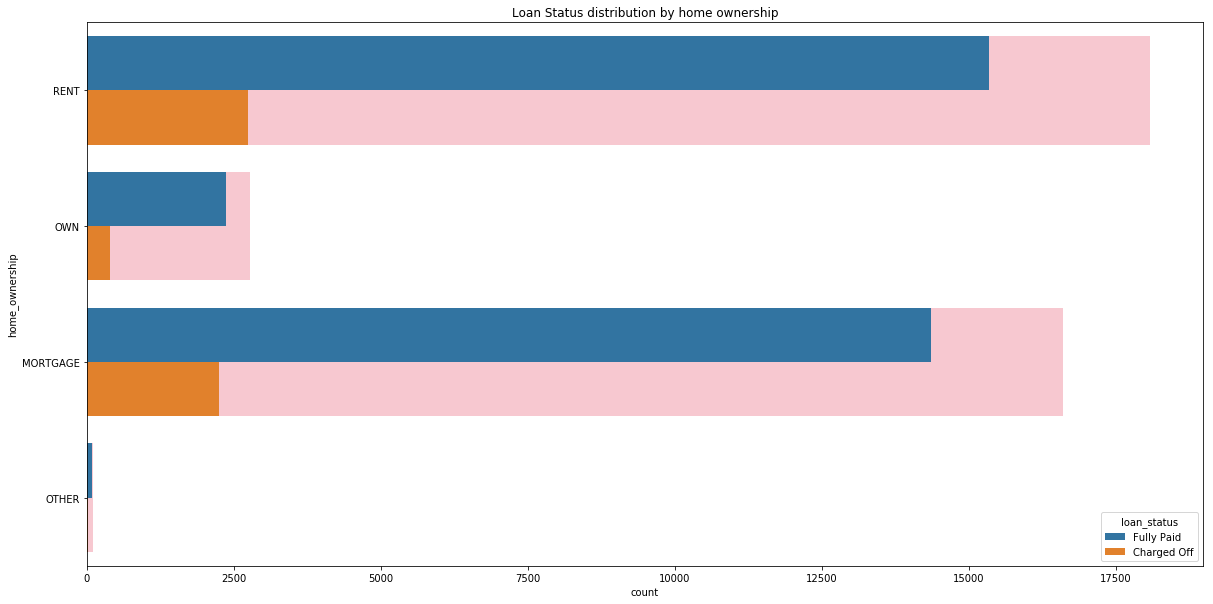

In [33]:
plt.figure(figsize=(20,10))
plt.title('Loan Status distribution by home ownership')
sns.countplot(y='home_ownership',data=loan,color="Pink")
sns.countplot(y='home_ownership',hue='loan_status',data=loan)
plt.show()

# Observation 
The maximum charged off accounts are from applicant which are living in Rented properties or a property with Mortage

3: Analysing relationship of loan purpose to Charged off loans



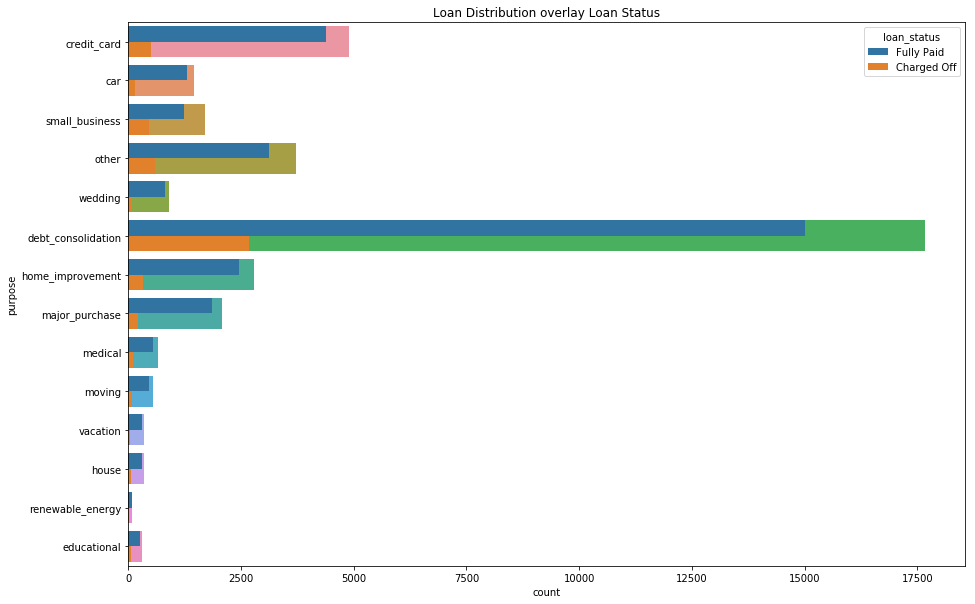

In [34]:
plt.figure(figsize=(15,10))
plt.title('Loan Distribution overlay Loan Status')
sns.countplot(y='purpose',data=loan)
sns.countplot(y='purpose',hue='loan_status',data=loan)
plt.show()

In [35]:
loan_purpose = pd.pivot_table(loan,values='loan_amnt', columns='loan_status',index='purpose',aggfunc='count',fill_value=0)
loan_purpose['Percentage_CO'] = (100 * loan_purpose['Charged Off']) / (loan_purpose['Charged Off'] + loan_purpose['Fully Paid'])
loan_purpose.sort_values('Percentage_CO',ascending=False)

loan_status,Charged Off,Fully Paid,Percentage_CO
purpose,,,
small_business,462,1248,27.017544
renewable_energy,18,76,19.148936
house,59,295,16.666667
educational,52,265,16.403785
other,596,3115,16.060361
medical,101,555,15.396341
moving,84,468,15.217391
debt_consolidation,2679,14995,15.157859
vacation,50,298,14.367816


#  Analysing loan term relationship with accounts charged off

In [36]:
loan_term = pd.pivot_table(loan,values='loan_amnt', columns='loan_status',index='term',aggfunc='count',fill_value=0)
loan_term['Percentage_CO'] = (100 * loan_term['Charged Off']) / (loan_term['Charged Off'] + loan_term['Fully Paid'])
loan_term.sort_values('Percentage_CO',ascending=False)

loan_status,Charged Off,Fully Paid,Percentage_CO
term,,,
60 months,2326,6931,25.126931
36 months,3073,25211,10.864800


In [37]:
groupbySalary=loan.groupby([pd.cut(loan["annual_inc"], np.arange(loan["annual_inc"].min(), loan["annual_inc"].max(), 60000)),'loan_status'])
loan_status_bySal=pd.DataFrame(groupbySalary.loan_status.count().sort_values(ascending=False))
loan_status_bySal.rename(columns={'loan_status':'loan_status_count'},inplace=True)
loan_status_bySal.reset_index(inplace=True)
loan_status_bySal=loan_status_bySal[loan_status_bySal['loan_status']=='Charged Off']
loan_status_bySal['percentage']=round(loan_status_bySal.loan_status_count/(loan_status_bySal.loan_status_count.sum()),4)*100

In [38]:
loan_status_bySal["annual_inc"].astype(str)
loan_status_bySal.reset_index(inplace=True)
loan_status_bySal.drop('index',axis=1,inplace=True)
loan_status_bySal['annual_inc']=loan_status_bySal['annual_inc'].astype(str).str.strip('()[]')
loan_status_bySal['annual_inc']=loan_status_bySal['annual_inc'].apply(lambda x: x.replace(',','-'))
loan_status_bySal

,annual_inc,loan_status,loan_status_count,percentage
0,4000.0- 64000.0,Charged Off,3450,63.90
1,64000.0- 124000.0,Charged Off,1624,30.08
2,124000.0- 184000.0,Charged Off,241,4.46
3,184000.0- 244000.0,Charged Off,50,0.93
4,244000.0- 304000.0,Charged Off,14,0.26
5,304000.0- 364000.0,Charged Off,6,0.11
6,484000.0- 544000.0,Charged Off,3,0.06
7,364000.0- 424000.0,Charged Off,2,0.04
8,664000.0- 724000.0,Charged Off,2,0.04
9,544000.0- 604000.0,Charged Off,2,0.04


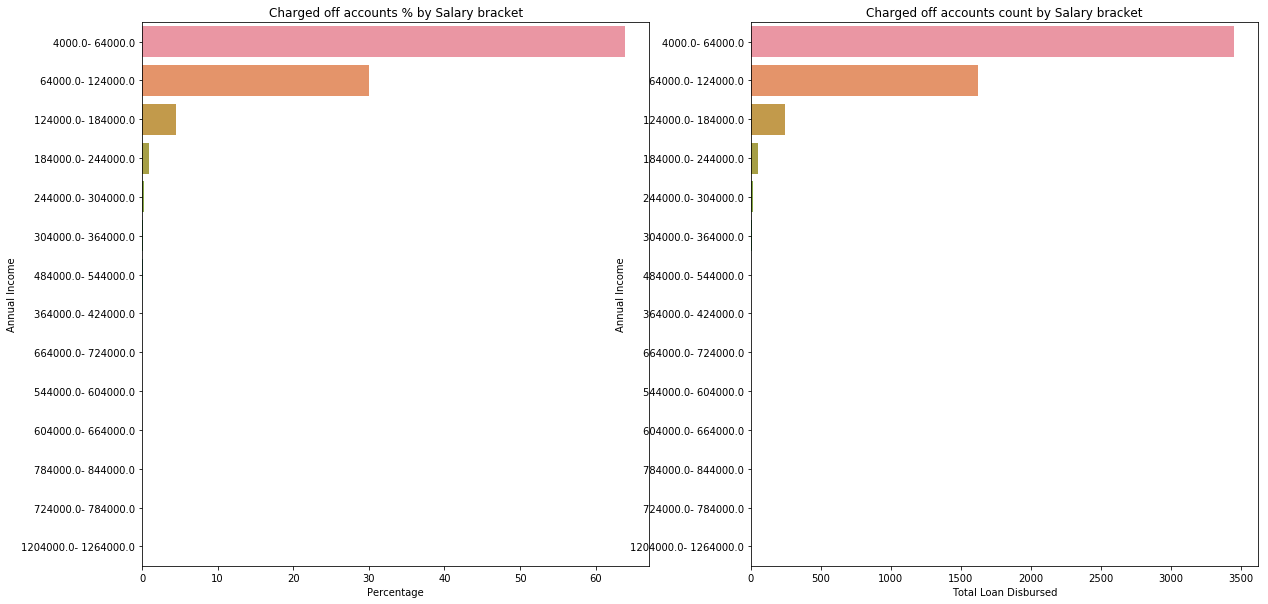

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Charged off accounts % by Salary bracket')
ax1=sns.barplot(y='annual_inc', x='percentage', data=loan_status_bySal,orient='h')
ax1.set(xlabel='Percentage', ylabel='Annual Income')
plt.subplot(122)
plt.title('Charged off accounts count by Salary bracket')
ax2=sns.barplot(y="annual_inc", x="loan_status_count",  data=loan_status_bySal,orient='h');
ax2.set(xlabel='Total Loan Disbursed', ylabel='Annual Income')
#loan_status_bySal.percentage.plot()
plt.show()

In [40]:
gp_open_ac=loan.groupby([pd.cut(loan["open_acc"], np.arange(0, 50, 2)),'loan_status'])
open_acc_df=pd.DataFrame(gp_open_ac.agg({'loan_status':'count','int_rate':'mean'}))
open_acc_df.rename(columns={'loan_status':'loan_app_count'},inplace=True)
open_acc_df.reset_index(inplace=True)

In [41]:
open_acc_df_CO=open_acc_df[(open_acc_df['loan_status']=='Charged Off')]
open_acc_df_FP=open_acc_df[(open_acc_df['loan_status']=='Fully Paid')]

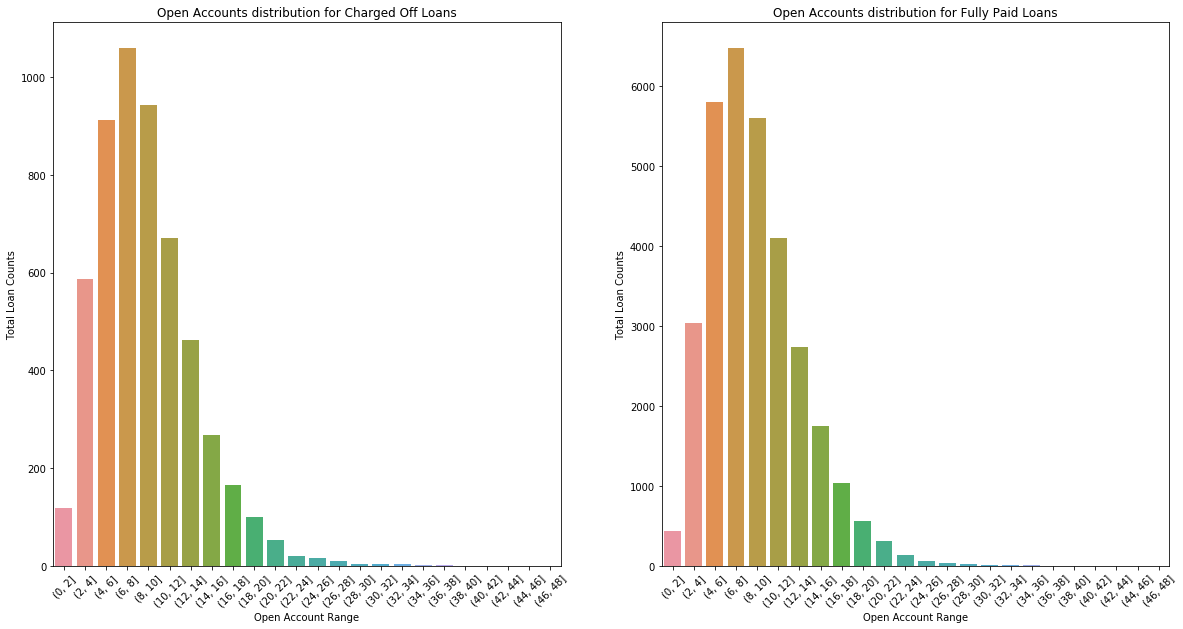

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Open Accounts distribution for Charged Off Loans')
ax=sns.barplot(y=open_acc_df_CO['loan_app_count'],x=open_acc_df_CO['open_acc'])
#ax=sns.barplot(y=df_CO['int_rate'],x=df_CO['open_acc'])
ax.set(ylabel='Total Loan Counts',xlabel='Open Account Range')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.subplot(122)
plt.title('Open Accounts distribution for Fully Paid Loans')
ax=sns.barplot(y=open_acc_df_FP['loan_app_count'],x=open_acc_df_FP['open_acc'])
#ax=sns.barplot(y=df_CO['int_rate'],x=df_CO['open_acc'])
ax.set(ylabel='Total Loan Counts',xlabel='Open Account Range')
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

In [43]:
open_acc_df['open_acc']=open_acc_df['open_acc'].astype(str).str.strip('()[]')
open_acc_df['open_acc']=open_acc_df['open_acc'].apply(lambda x: x.replace(',','-'))
open_acc_pivot=pd.pivot_table(open_acc_df,values='loan_app_count', columns='loan_status',index='open_acc',aggfunc='sum')

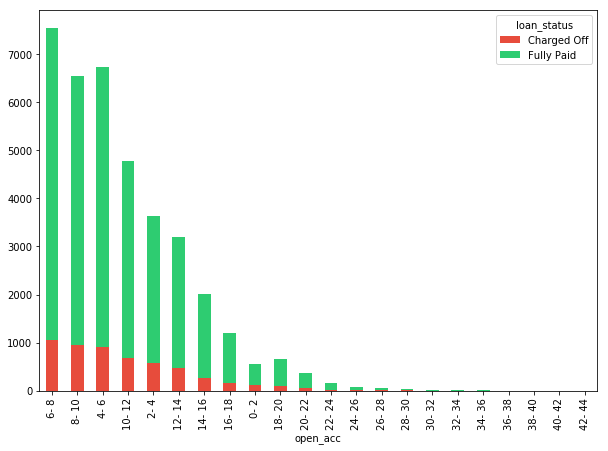

In [44]:
open_acc_pivot.sort_values(by=['Charged Off'],inplace=True,ascending=False)
colors = ["#e74c3c","#2ecc71"]
open_acc_pivot.loc[:,['Charged Off','Fully Paid']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.show()

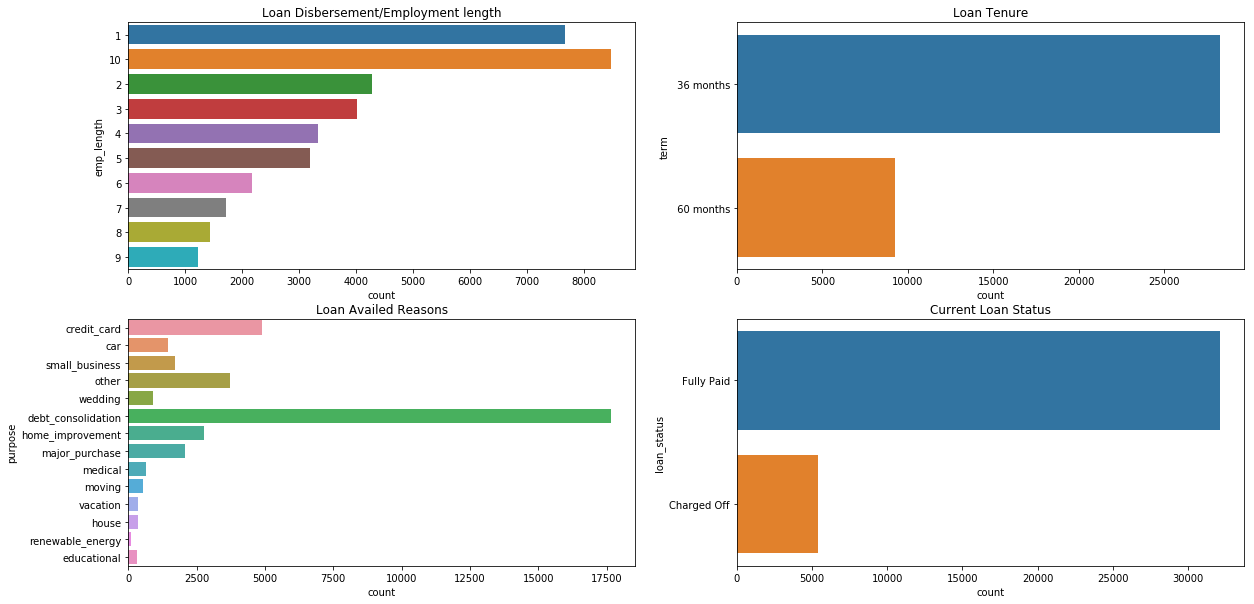

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title("Loan Disbersement/Employment length")
sns.countplot(y='emp_length',data=loan)
plt.subplot(222)
plt.title("Loan Tenure")
sns.countplot(y='term',data=loan)
plt.subplot(223)
plt.title("Loan Availed Reasons")
sns.countplot(y='purpose',data=loan)
plt.subplot(224)
plt.title("Current Loan Status")
sns.countplot(y='loan_status',data=loan)
plt.show()

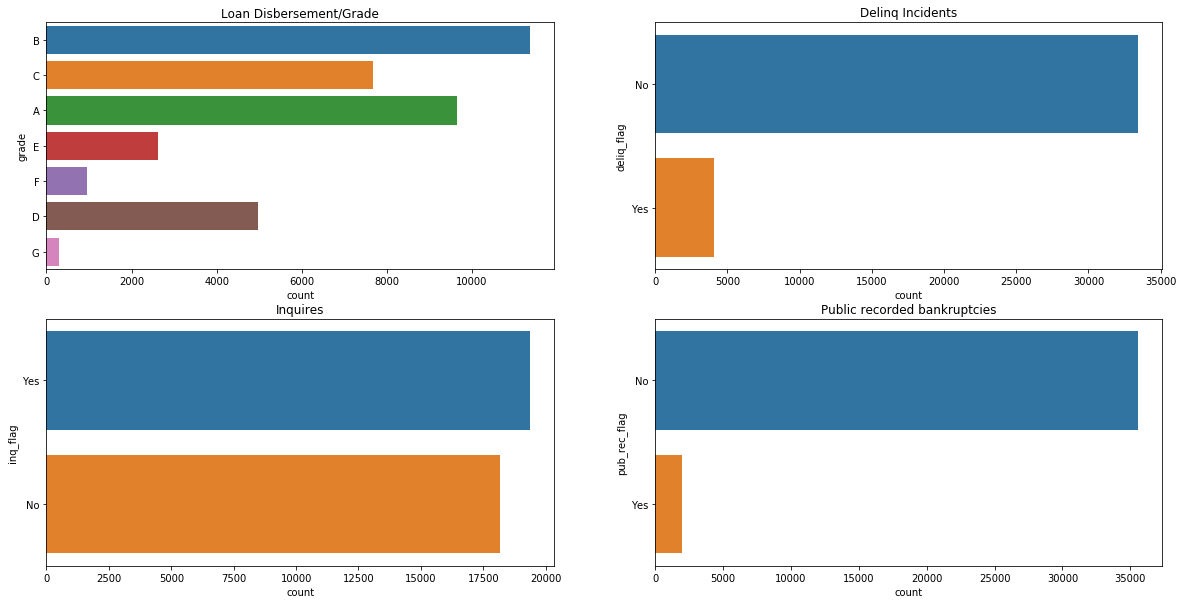

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title("Loan Disbersement/Grade")
sns.countplot(y='grade',data=loan)
plt.subplot(222)
plt.title("Delinq Incidents")
sns.countplot(y='deliq_flag',data=loan)
plt.subplot(223)
plt.title("Inquires")
sns.countplot(y='inq_flag',data=loan)
plt.subplot(224)
plt.title("Public recorded bankruptcies")
sns.countplot(y='pub_rec_flag',data=loan)
plt.show()

In [47]:
def two_cat_freq(col):
    c1 = loan.groupby(col).loan_status.apply(lambda x : round(sum(x != 'Fully Paid' )/len(x)*100,1))
    c2 = loan.groupby(col).loan_status.apply(lambda x : round(len(x)/len(loan)*100,1))
    c3 = pd.concat([c1,c2],axis =1)
    c3.columns = ["Def%","Pop%"]
    c3['Level_1'] = c3.index.get_level_values(0)
    c3['Level_2'] = c3.index.get_level_values(1)
    c3['Category_1'] = col[0]
    c3['Category_2'] = col[1]
    c3.reset_index(drop = True , inplace = True)
    return(c3)

In [48]:
# getting default % ages & population % ages for the important categories
keep_str = ['deliq_flag' , 'grade' , 'home_ownership' , 'inq_flag' ,
           'pub_rec_flag' ,'purpose' , 'term' ]
df = pd.DataFrame(columns = ['category' , 'Level' , "Def%" , "Pop%" ])
for i in range(0,len(keep_str),1):
    df=pd.concat([df,col_merge(keep_str[i])])
df['base_Percent']  = round(sum(loan.loan_status != 'Fully Paid' )/len(loan)*100,1)
df = df[['category','Level','Def%','Pop%','base_Percent']]
df = df.sort_values(['category','Level'] )

In [49]:
##Category two Level Interaction Data
#b = loan.loc[:,loan.dtypes == 'object'].columns
keep_str = ['deliq_flag' , 'grade' , 'home_ownership' , 'inq_flag','pub_rec_flag' ,'purpose' , 'term' ]
df1 = pd.DataFrame(columns = ['Category_1' , 'Category_2' , 'Level_1' , 'Level_2', 'Def%' , "Pop%" ])
for i in range(len(keep_str)):
    for j in range(len(keep_str)):
        if (j >= i) : continue
        val = [keep_str[i],keep_str[j]]
        df1 = pd.concat([df1,two_cat_freq(val)])

In [50]:
# merging the data frames to have category level interaction (bi - variate analysis of categorical variables)
df2 = pd.merge(df1 , df , how = 'inner' , left_on = ['Category_1' , 'Level_1'] , right_on = ['category','Level'] )
df2.drop(['Level','category','base_Percent'] , axis =1 , inplace = True)
df2.rename(columns={'Def%_x': 'Def%', 'Def%_y': 'Def%_LC1' , 'Pop%_x': 'Pop%' , 'Pop%_y':'Pop%_LC1'}, inplace=True)
df2 = pd.merge(df2 , df , how = 'inner' , left_on = ['Category_2' , 'Level_2'] , right_on = ['category','Level'] )
df2.drop(['Level','category'] , axis =1 , inplace = True)
df2.rename(columns={'Def%_x': 'Def%', 'Def%_y': 'Def%_LC2' , 'Pop%_x': 'Pop%' , 'Pop%_y':'Pop%_LC2'}, inplace=True)
df2 = df2[['Category_1','Category_2','Level_1','Level_2','Def%','Def%_LC1','Def%_LC2','Pop%','Pop%_LC1','Pop%_LC2','base_Percent']]
df2.sort_values(['Category_1','Category_2','Level_1'] , inplace = True)
df2

,Category_1,Category_2,Level_1,Level_2,Def%,Def%_LC1,Def%_LC2,Pop%,Pop%_LC1,Pop%_LC2,base_Percent
0,grade,deliq_flag,A,No,5.7,5.8,14.2,24.7,25.7,89.1,14.4
31,grade,deliq_flag,A,Yes,8.2,5.8,16.2,1.0,25.7,10.9,14.4
1,grade,deliq_flag,B,No,12.1,11.9,14.2,27.5,30.3,89.1,14.4
32,grade,deliq_flag,B,Yes,10.1,11.9,16.2,2.8,30.3,10.9,14.4
2,grade,deliq_flag,C,No,17.0,16.8,14.2,17.6,20.4,89.1,14.4
33,grade,deliq_flag,C,Yes,15.3,16.8,16.2,2.8,20.4,10.9,14.4
3,grade,deliq_flag,D,No,22.5,21.8,14.2,10.9,13.3,89.1,14.4
34,grade,deliq_flag,D,Yes,18.3,21.8,16.2,2.3,13.3,10.9,14.4
4,grade,deliq_flag,E,No,27.2,26.7,14.2,5.8,7.0,89.1,14.4
35,grade,deliq_flag,E,Yes,24.3,26.7,16.2,1.2,7.0,10.9,14.4


In [51]:
# Filtering the data for Category population >= 5
df2.loc[(df2['Def%'] > df2['Def%_LC1']) & (df2['Def%'] > df2['Def%_LC2']) & (df2['Pop%'] >= 5),:].sort_values('Def%',ascending=False)[:10]

,Category_1,Category_2,Level_1,Level_2,Def%,Def%_LC1,Def%_LC2,Pop%,Pop%_LC1,Pop%_LC2,base_Percent
307,term,home_ownership,60 months,RENT,27.9,25.1,15.1,9.9,24.7,48.2,14.4
343,term,inq_flag,60 months,Yes,27.3,25.1,16.6,13.6,24.7,51.6,14.4
4,grade,deliq_flag,E,No,27.2,26.7,14.2,5.8,7.0,89.1,14.4
381,term,purpose,60 months,debt_consolidation,26.2,25.1,15.2,12.9,24.7,47.1,14.4
139,inq_flag,grade,Yes,D,23.7,16.6,21.8,7.7,51.6,13.3,14.4
3,grade,deliq_flag,D,No,22.5,21.8,14.2,10.9,13.3,89.1,14.4
43,inq_flag,deliq_flag,Yes,Yes,18.4,16.6,16.2,5.8,51.6,10.9,14.4
115,inq_flag,grade,Yes,C,18.3,16.6,16.8,13.0,51.6,20.4,14.4
337,purpose,inq_flag,other,Yes,18.2,16.1,16.6,5.1,9.9,51.6,14.4
301,purpose,home_ownership,other,RENT,18.1,16.1,15.1,5.4,9.9,48.2,14.4
